In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import argparse
import os

from skopt import load
from skopt.plots import plot_evaluations, plot_convergence, plot_objective
import matplotlib.ticker as plticker
import seaborn as sns

In [2]:
folder = "../../../data/results/vaerec/logs-1553877308-loss/"

In [3]:
opt_res = load("{:s}/optimize.gz".format(folder))

In [4]:
df = pd.read_csv("{:s}/results.csv".format(folder))
names = df.drop(['Recall@20', 'Recall@50', 'NDCG@100',
       'Coverage'], axis=1).columns
names = list(names)

In [5]:
#axes = plot_evaluations(opt_res, bins=10, dimensions=names)
#axes.flatten()[0].figure.savefig("evaluations.pdf", bbox_inches = "tight")

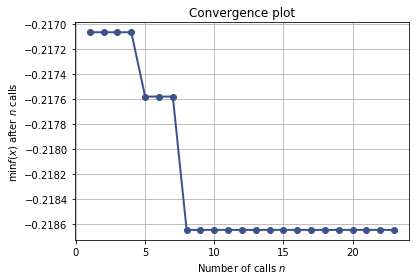

In [6]:
axes = plot_convergence(opt_res)
#axes.figure.savefig("convergence.pdf")

In [7]:
#axes = plot_objective(opt_res, dimensions=names)
#axes.flatten()[0].yaxis.set_major_locator(plticker.MaxNLocator(4))
#axes.flatten()[3].yaxis.set_major_locator(plticker.MaxNLocator(4))
#axes.flatten()[3].xaxis.set_major_locator(plticker.MaxNLocator(3))
#axes.flatten()[0].figure.savefig("objective.pdf", bbox_inches = "tight")

In [8]:
df = df.replace("<function poisson at 0x2b4e2e85ee18>", "poisson")
df = df.replace("<function logcosh at 0x2b4e2e85eb70>", "logcosh")
df = df.replace("<function cosine_proximity at 0x2b4e2e85eea0>", "cosine_proximity")
df = df.replace("<function squared_hinge at 0x2b4e2e85e9d8>", "squared_hinge")
df = df.replace("<function mean_squared_error at 0x2b4e2e85e7b8>", "mean_squared_error")
df = df.replace("<function log_loss at 0x2b4e2a379840>", "log_loss")
#df = df[df['loss_function'] != 'kullback_leibler_divergence']
#df = df[df['epochs'] < 90]

In [9]:
df

loss_function  Recall@20  Recall@50  NDCG@100  Coverage
0              poisson   0.222603   0.371460  0.217064  0.192008
1              logcosh   0.159176   0.264850  0.155224  0.005227
2     cosine_proximity   0.139026   0.299348  0.154486  0.284818
3     cosine_proximity   0.134214   0.295668  0.152369  0.281333
4             log_loss   0.224106   0.375026  0.217578  0.202230
5              logcosh   0.158756   0.267203  0.155585  0.005459
6        squared_hinge   0.158297   0.263528  0.154382  0.004066
7              poisson   0.223225   0.374803  0.218644  0.188407
8              logcosh   0.158743   0.262094  0.155148  0.005169
9   mean_squared_error   0.159764   0.268525  0.158195  0.020676
10            log_loss   0.226226   0.373791  0.217689  0.197642
11  mean_squared_error   0.160483   0.267495  0.159449  0.019979
12             logcosh   0.159925   0.263098  0.155132  0.005053
13            log_loss   0.223802   0.373252  0.217795  0.201998
14             poisson   0.222204   0.371624  0.217335  0.192705
15    cosine_proximity   0.137700   0.299160  0.154580  0.288826
16             logcosh   0.157282   0.262069  0.155116  0.005169
17    cosine_proximity   0.138276   0.297701  0.153526  0.285864
18    cosine_proximity   0.137572   0.297718  0.153875  0.284528
19       squared_hinge   0.155416   0.262557  0.154565  0.004356
20    cosine_proximity   0.140858   0.298018  0.153859  0.290336
21             logcosh   0.158666   0.264890  0.155373  0.005343
22    cosine_proximity   0.139875   0.303299  0.155440  0.289639

           Recall@20  Recall@50  NDCG@100  Coverage
Recall@20   1.000000   0.827227  0.971836  0.005331
Recall@50   0.827227   1.000000  0.935079  0.564706
NDCG@100    0.971836   0.935079  1.000000  0.237131
Coverage    0.005331   0.564706  0.237131  1.000000


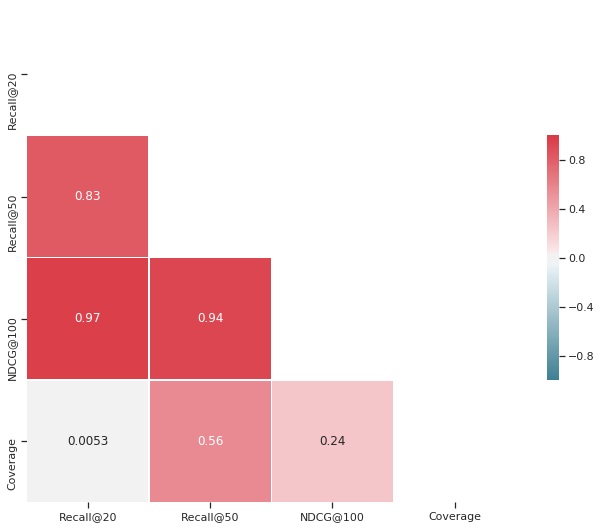

In [12]:
# Compute the correlation matrix
corr = df[["Recall@20","Recall@50","NDCG@100","Coverage"]].corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig = sns_plot.get_figure()
#fig.savefig("corr.pdf")

[Text(0,0,'poisson'),
 Text(0,0,'logcosh'),
 Text(0,0,'cosine_proximity'),
 Text(0,0,'log_loss'),
 Text(0,0,'squared_hinge'),
 Text(0,0,'mean_squared_error')]

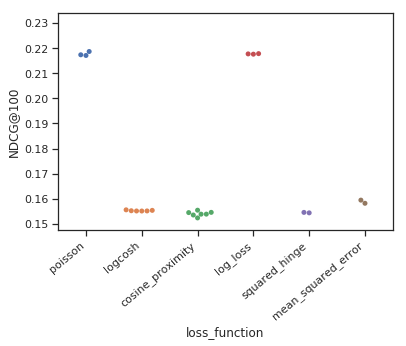

In [13]:
sns.set(style="ticks")
sns_plot = sns.swarmplot(x="loss_function", y="NDCG@100", data=df)
sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=40, ha="right")

In [14]:
#fig = sns_plot.get_figure()
#fig.savefig("vae_loss_1HL_ml.pdf", bbox_inches = "tight")

In [15]:
fig, ax =plt.subplots(1,2, figsize=(13,4))
sns_plot = sns.swarmplot(x="loss_function", y="NDCG@100",data=df, ax=ax[0])
sns_plot = sns.swarmplot(x="loss_function", y="Coverage",data=df, ax=ax[1])
fig.show()

/home/michal/miniconda3/envs/van/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [20]:
#fig.savefig("vae_beta_1HL_ml.pdf", bbox_inches = "tight")